In [6]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import numpy as np
import PIL
import keras

In [9]:
#vgg16_model = VGG16(weights='imagenet',include_top=False, input_shape=(256,256,3))

In [31]:
#VGG16 : 太容易过拟合 先不用
# top_model = Sequential()
# top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
# top_model.add(Dense(256,activation='relu'))
# top_model.add(Dropout(0.5))
# top_model.add(Dense(2,activation='softmax'))
# model = Sequential()
# model.add(vgg16_model)
# model.add(top_model)

#3层卷积
imgSize = 512  #图片是512*512
imgChan = 3    #3通道
kernelInit = 'uniform'  #卷积核初始化方式
nHiddenUnits = 50
maxpoolSize = (2,2)
nFilters = 130 #130 before 
kernelSize = (2,2)
inputStrides = 1
costFunction = 'categorical_crossentropy' #代价函数:不同于损失函数，代价函数在整个训练集上计算
early_stop_delta = 0.01 # 0.01 change or above is considered improvement
early_stop_patience = 10 

model=Sequential()

model.add(Conv2D(filters=nFilters, kernel_size = kernelSize ,strides= inputStrides,
                 input_shape=(512,512,3),kernel_initializer= kernelInit))
model.add(Activation('relu'))



model.add(MaxPooling2D(pool_size=maxpoolSize))


model.add(Conv2D(filters=nFilters, kernel_size = kernelSize ,strides= inputStrides,
                 kernel_initializer= kernelInit))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=maxpoolSize))


model.add(Conv2D(filters=nFilters, kernel_size = kernelSize ,strides= inputStrides,
                 kernel_initializer= kernelInit))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=maxpoolSize))

model.add(Flatten())
model.add(Dense(nHiddenUnits))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=early_stop_delta, patience=early_stop_patience, verbose=2, mode='auto')

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 511, 511, 130)     1690      
_________________________________________________________________
activation_24 (Activation)   (None, 511, 511, 130)     0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 255, 255, 130)     0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 254, 254, 130)     67730     
_________________________________________________________________
activation_25 (Activation)   (None, 254, 254, 130)     0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 127, 127, 130)     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 126, 126, 130)    

In [32]:
#测试 ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range = 40,     # 随机旋转度数
    width_shift_range = 0.2, # 随机水平平移
    height_shift_range = 0.2,# 随机竖直平移
    rescale = 1/255,         # 数据归一化
    shear_range = 20,       # 随机错切变换
    zoom_range = 0.2,        # 随机放大
    horizontal_flip = True,  # 水平翻转
    fill_mode = 'nearest',   # 填充方式
)
test_datagen = ImageDataGenerator(
    rescale = 1/255,         # 数据归一化
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255,)

In [33]:
batch_size = 10
# 生成训练数据
train_generator = train_datagen.flow_from_directory(
    '../../data/imgProcessed/training',
    target_size=(imgSize,imgSize),
    batch_size=batch_size,
    )

# 测试数据
test_generator = test_datagen.flow_from_directory(
    '../../data/imgProcessed/test',
    target_size=(imgSize,imgSize),
    batch_size=batch_size,
    )

#验证集
validation_generator = validation_datagen.flow_from_directory(
    '../../data/imgProcessed/validation',
    target_size=(imgSize,imgSize),
    batch_size=batch_size,
    )

Found 244 images belonging to 2 classes.
Found 107 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [34]:
train_generator.class_indices

{'m': 0, 's': 1}

In [35]:
model.compile(optimizer=SGD(lr=1e-4,momentum=0.9),loss=costFunction,metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 511, 511, 130)     1690      
_________________________________________________________________
activation_24 (Activation)   (None, 511, 511, 130)     0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 255, 255, 130)     0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 254, 254, 130)     67730     
_________________________________________________________________
activation_25 (Activation)   (None, 254, 254, 130)     0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 127, 127, 130)     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 126, 126, 130)    

In [40]:
from PIL import Image
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=20,validation_data=validation_generator,validation_steps=len(validation_generator))

Epoch 1/20
25/25 [==============================] - 250s 10s/step - loss: 0.6921 - acc: 0.5863 - val_loss: 0.6914 - val_acc: 0.6875
Epoch 2/20
25/25 [==============================] - 245s 10s/step - loss: 0.6917 - acc: 0.6006 - val_loss: 0.6907 - val_acc: 0.5833
Epoch 3/20
25/25 [==============================] - 246s 10s/step - loss: 0.6911 - acc: 0.6699 - val_loss: 0.6905 - val_acc: 0.6875
Epoch 4/20
25/25 [==============================] - 246s 10s/step - loss: 0.6907 - acc: 0.6344 - val_loss: 0.6897 - val_acc: 0.8542
Epoch 5/20
25/25 [==============================] - 245s 10s/step - loss: 0.6903 - acc: 0.6419 - val_loss: 0.6893 - val_acc: 0.8542
Epoch 6/20
25/25 [==============================] - 234s 9s/step - loss: 0.6907 - acc: 0.6219 - val_loss: 0.6889 - val_acc: 0.6667
Epoch 7/20
25/25 [==============================] - 228s 9s/step - loss: 0.6897 - acc: 0.6659 - val_loss: 0.6878 - val_acc: 0.8750
Epoch 8/20
25/25 [==============================] - 227s 9s/step - loss: 0.689

In [41]:
model.save("../../model/Conv3_512.h5")

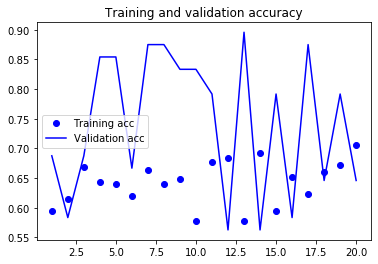

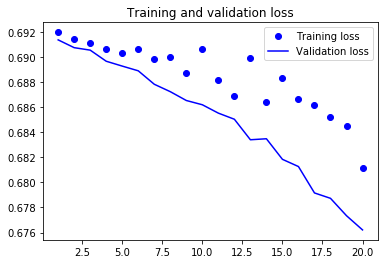

In [42]:
#画出结果
import matplotlib.pyplot as plt

#查看变量，发现history.history中就只有这四个值，分别是准确度，验证集准确度，损失，验证集损失
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#画两个图，分别是正确率和验证损失率
#正确率
plt.figure(1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('acc.png')
plt.show()
#损失
plt.figure(2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()
